## Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encoding
from sklearn.preprocessing import LabelEncoder

# Save model
import pickle

## Load Dataset

In [2]:
data = pd.read_csv("data/Salary_dataset.csv")
data.head()

,Experience,Education,Role,Skills,Salary
0,1,Masters,Junior,2,38309
1,6,Bachelors,Mid,5,67505
2,8,PhD,Senior,1,89761
3,10,PhD,Senior,9,115939
4,0,Bachelors,Junior,5,28718


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Experience  200 non-null    int64 
 1   Education   200 non-null    object
 2   Role        200 non-null    object
 3   Skills      200 non-null    int64 
 4   Salary      200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
data.describe()

,Experience,Skills,Salary
count,200.000000,200.000000,200.000000
mean,7.165000,5.665000,83040.465000
std,4.536593,2.769681,29170.344201
min,0.000000,1.000000,27576.000000
25%,3.000000,3.000000,58187.750000
50%,7.000000,6.000000,81048.500000
75%,11.000000,8.000000,108986.750000
max,15.000000,10.000000,136373.000000


## Data Visualization (EDA)

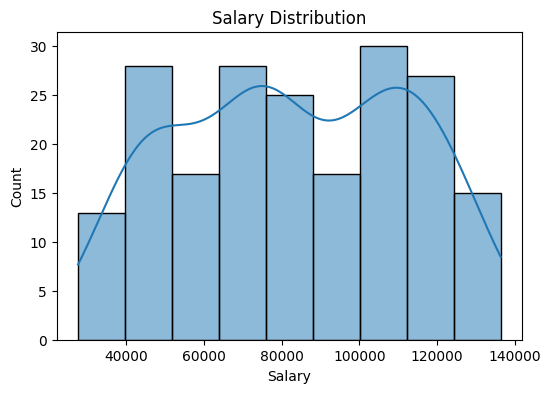

In [6]:
# Salary distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

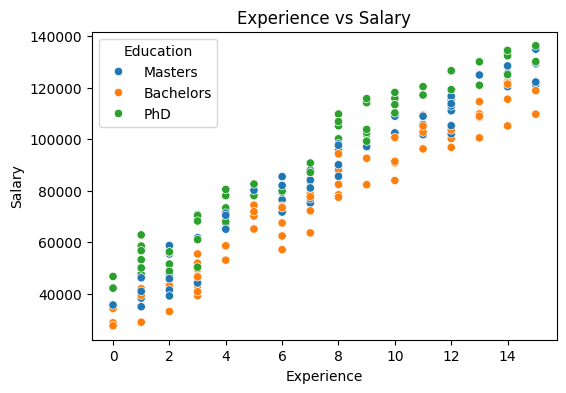

In [7]:
# Experience vs Salary
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Experience",
    y="Salary",
    hue="Education",
    data=data
)
plt.title("Experience vs Salary")
plt.show()


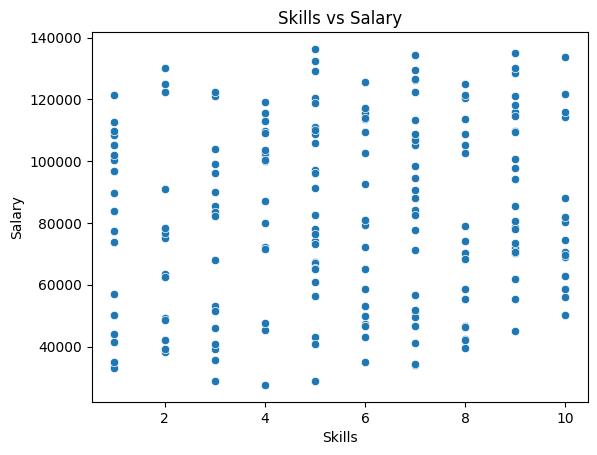

In [8]:
# Skills vs Salary
sns.scatterplot(
    x="Skills",
    y="Salary",
    data=data
)
plt.title("Skills vs Salary")
plt.show()

## Encode Categorical Features

In [9]:
# Converting text → numbers
le_edu = LabelEncoder()
le_role = LabelEncoder()

data['Education'] = le_edu.fit_transform(data['Education'])
data['Role'] = le_role.fit_transform(data['Role'])

data.head()

,Experience,Education,Role,Skills,Salary
0,1,1,0,2,38309
1,6,0,1,5,67505
2,8,2,2,1,89761
3,10,2,2,9,115939
4,0,0,0,5,28718


In [10]:
# Mapping reference
print("Education Mapping:")
print(dict(zip(le_edu.classes_, le_edu.transform(le_edu.classes_))))

print("\nRole Mapping:")
print(dict(zip(le_role.classes_, le_role.transform(le_role.classes_))))

Education Mapping:
{'Bachelors': np.int64(0), 'Masters': np.int64(1), 'PhD': np.int64(2)}

Role Mapping:
{'Junior': np.int64(0), 'Mid': np.int64(1), 'Senior': np.int64(2)}


## Feature & Target Split

In [11]:
X = data[['Experience', 'Education', 'Role', 'Skills']]
y = data['Salary']

## Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (160, 4)
Testing size: (40, 4)


## Train Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
# Coefficients
coeff_df = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=["Coefficient"]
)

coeff_df

,Coefficient
Experience,5010.228991
Education,8036.323094
Role,7000.158198
Skills,1980.959230


## Predictions

In [15]:
y_pred = model.predict(X_test)

# Comparison
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

comparison.head()

,Actual,Predicted
95,78113,80966.373800
15,79160,77943.455355
30,34180,33890.734991
158,121459,120015.216489
128,126429,124086.445465


## Model Evaluation

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Model Performance
MSE : 3188884.0538211297
RMSE: 1785.7446776684312
R2 Score: 0.9961991634858498


## Prediction Visualization

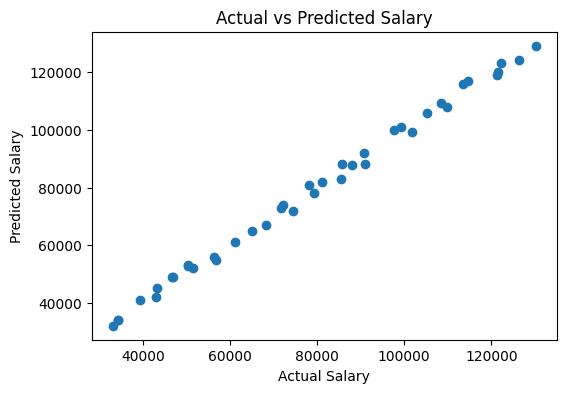

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

## Residual Plot

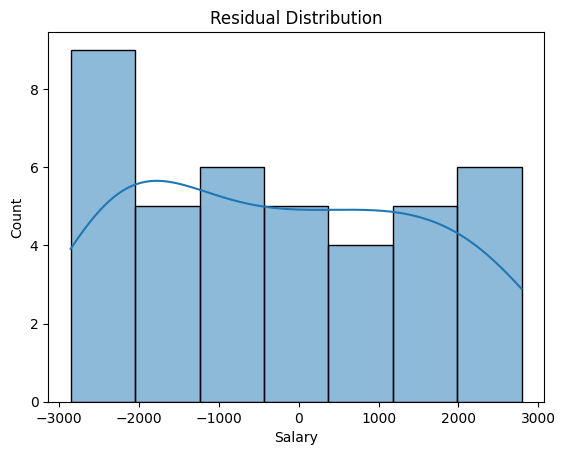

In [18]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

## Save Model + Encoders

In [19]:
pickle.dump(model, open("salary_model.pkl", "wb"))
pickle.dump(le_edu, open("edu_encoder.pkl", "wb"))
pickle.dump(le_role, open("role_encoder.pkl", "wb"))

print("Model & encoders saved successfully!")


Model & encoders saved successfully!
